Group 17

team member: Ali Shah, Arsalan Aman, Ping Chun Lee


In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data preparation

In [ ]:
# retrieve Bitcoin price data from cryptocomare website
endpoint = 'https://min-api.cryptocompare.com/data/v2/histoday'
response = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=1999&api_key=346a5653477eed39d369f3b05523c27a427a45ab31125be8a8dbf06cf4478d49')

# save to dataframe type
dataTable = pd.DataFrame(json.loads(response.content)['Data']['Data'])

# convert time to timestamp type and set it as index
dataTable = dataTable.set_index('time')
dataTable.index = pd.to_datetime(dataTable.index, unit='s')

# drop unuseless variables
dataTable.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

# create total volume variables
dataTable['volume'] = dataTable.volumefrom + dataTable.volumeto

dataTable.head()

,high,low,open,volumefrom,volumeto,close,volume
time,,,,,,,
2017-05-21,2094.94,1980.07,2040.18,78775.32,1.610368e+08,2044.19,1.611156e+08
2017-05-22,2264.76,1998.61,2044.19,174376.65,3.734825e+08,2124.41,3.736569e+08
2017-05-23,2286.30,2110.78,2124.41,114179.23,2.519691e+08,2272.58,2.520833e+08
2017-05-24,2496.98,2263.29,2272.58,149254.84,3.537340e+08,2445.28,3.538833e+08
2017-05-25,2781.76,2210.48,2445.28,248438.97,6.221390e+08,2307.22,6.223875e+08


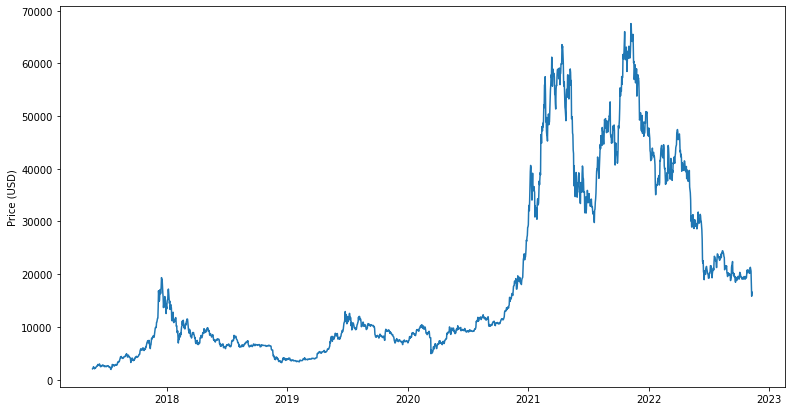

In [ ]:
# show price trend plot
plt.figure(figsize=(13, 7))
plt.ylabel("Price (USD)")
plt.plot(dataTable.close)

# feature creation

In [ ]:
# create dataframe to store new features from the source data
features = pd.DataFrame(index=dataTable.index).sort_index()

# feature 1: daily price rate
features['f1'] = dataTable.close/dataTable.open-1
features.head()

,f1
time,
2017-05-21,0.001966
2017-05-22,0.039243
2017-05-23,0.069746
2017-05-24,0.075993
2017-05-25,-0.056460


In [ ]:
# feature 2: apply log to volume
features['f2'] = dataTable.volume.apply(np.log)

# feature 3: difference per day
features['f3'] = dataTable.volume.diff()

# feature 4: difference per week
features['f4'] = dataTable.volume.diff(7)

# feature 5: difference per month (approximation)
features['f5'] = dataTable.volume.diff(30)

# feature 6: daily volume change rate
features['f6'] = dataTable.volume.pct_change()

# feature 7: weekly volume change rate
features['f7'] = dataTable.volume.pct_change(7)

# feature 8: monthly volume change rate
features['f8'] = dataTable.volume.pct_change(30)

features.tail()

,f1,f2,f3,f4,f5,f6,f7,f8
time,,,,,,,,
2022-11-06,-0.018355,20.190515,-1.192412e+08,-2.106382e+08,-5.909034e+08,-0.168842,-0.264081,-0.501662
2022-11-07,-0.015153,21.133312,9.198988e+08,2.462151e+08,1.167431e+09,1.567151,0.195305,3.439126
2022-11-08,-0.099498,22.116111,2.519401e+09,3.028962e+09,3.640002e+09,1.671925,3.037085,9.423079
2022-11-09,-0.146925,22.162192,1.898769e+08,2.354767e+09,3.359788e+09,0.047159,1.265053,3.923261
2022-11-10,0.048542,20.357104,-3.522774e+09,-4.023752e+08,-4.800461e+08,-0.835540,-0.367209,-0.409094


In [ ]:
# feature 9: log of 7 day moving average of volume
features['f9']=dataTable.volume.rolling(7).mean().apply(np.log)

# feature 10: log of 30 day moving average of volume
features['f10']=dataTable.volume.rolling(30).mean().apply(np.log)

# feature 11: daily volume vs. 200 day moving average
features['f11']=dataTable.volume/dataTable.volume.rolling(200).mean()-1

# feature 12: daily closing price vs. 50 day exponential moving avg
features['f12']=dataTable.close/dataTable.close.ewm(span=50).mean()-1

features.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
time,,,,,,,,,,,,
2022-11-06,-0.018355,20.190515,-1.192412e+08,-2.106382e+08,-5.909034e+08,-0.168842,-0.264081,-0.501662,20.922833,20.825181,-0.466776,0.039060
2022-11-07,-0.015153,21.133312,9.198988e+08,2.462151e+08,1.167431e+09,1.567151,0.195305,3.439126,20.951236,20.859721,0.367731,0.022380
2022-11-08,-0.099498,22.116111,2.519401e+09,3.028962e+09,3.640002e+09,1.671925,3.037085,9.423079,21.247259,20.960342,2.607463,-0.076471
2022-11-09,-0.146925,22.162192,1.898769e+08,2.354767e+09,3.359788e+09,0.047159,1.265053,3.923261,21.428911,21.045009,2.715003,-0.205551
2022-11-10,0.048542,20.357104,-3.522774e+09,-4.023752e+08,-4.800461e+08,-0.835540,-0.367209,-0.409094,21.400116,21.033342,-0.389547,-0.161496


In [ ]:
# feature 13: get the z score for every 200 data points
features['f13']=(dataTable.close - dataTable.close.rolling(window=200, min_periods=20).mean()) / dataTable.close.rolling(window=200, min_periods=200).std()

features.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
time,,,,,,,,,,,,,
2022-11-06,-0.018355,20.190515,-1.192412e+08,-2.106382e+08,-5.909034e+08,-0.168842,-0.264081,-0.501662,20.922833,20.825181,-0.466776,0.039060,-0.524228
2022-11-07,-0.015153,21.133312,9.198988e+08,2.462151e+08,1.167431e+09,1.567151,0.195305,3.439126,20.951236,20.859721,0.367731,0.022380,-0.572778
2022-11-08,-0.099498,22.116111,2.519401e+09,3.028962e+09,3.640002e+09,1.671925,3.037085,9.423079,21.247259,20.960342,2.607463,-0.076471,-0.928945
2022-11-09,-0.146925,22.162192,1.898769e+08,2.354767e+09,3.359788e+09,0.047159,1.265053,3.923261,21.428911,21.045009,2.715003,-0.205551,-1.414125
2022-11-10,0.048542,20.357104,-3.522774e+09,-4.023752e+08,-4.800461e+08,-0.835540,-0.367209,-0.409094,21.400116,21.033342,-0.389547,-0.161496,-1.276112


# analysis

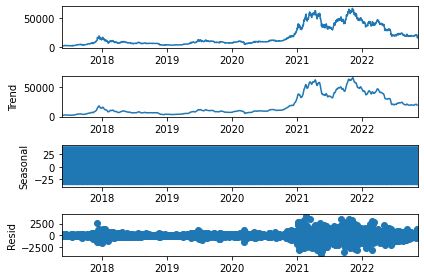

In [ ]:
# check seasonal trend
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = dataTable[['close']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

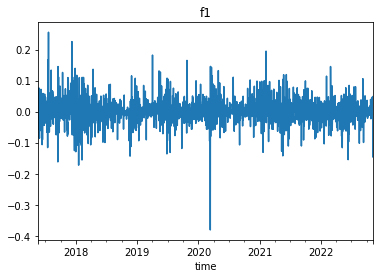

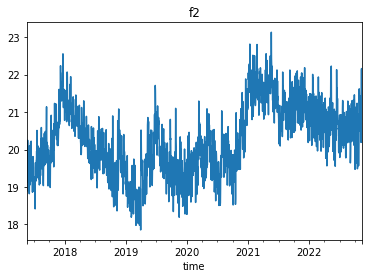

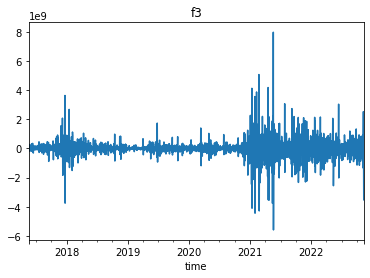

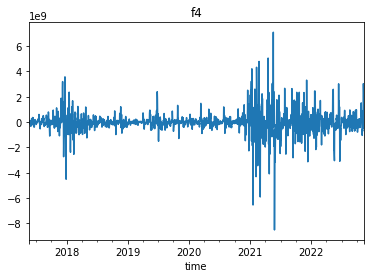

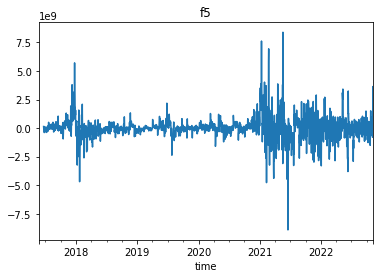

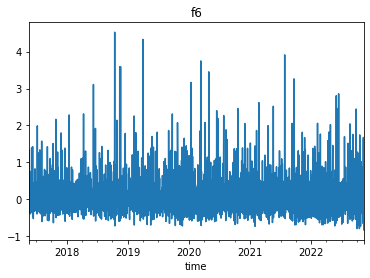

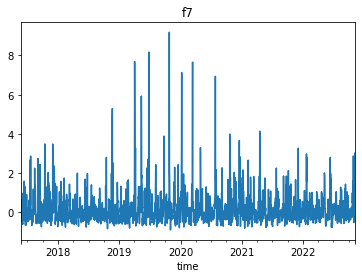

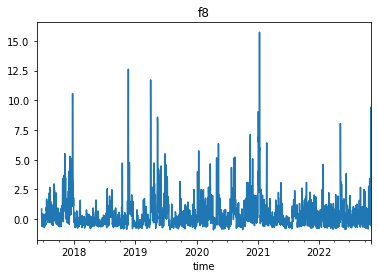

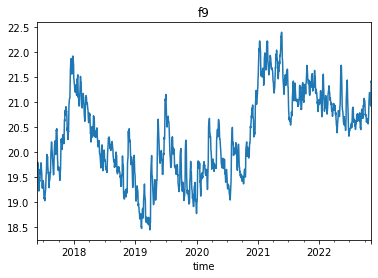

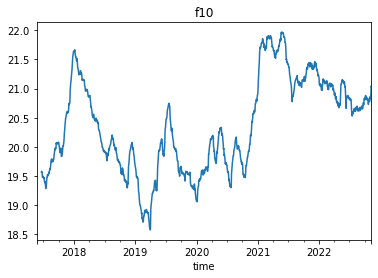

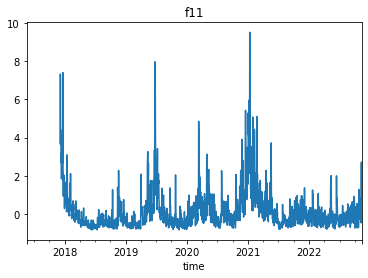

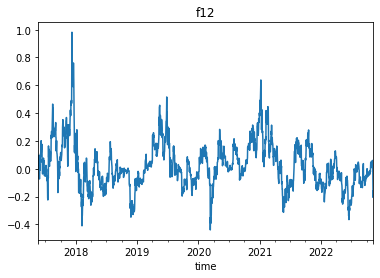

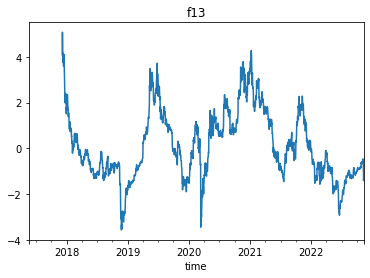

In [ ]:
# make plot for each features
for i in features.columns:
  features[i].plot()
  plt.title(i)
  plt.show()

# feature selection

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial import distance

In [ ]:
features['prices'] = dataTable['close'] # the prices should be standardize together

In [ ]:
# stadardize the features dataframe
scaler = StandardScaler()
features_sc_np = scaler.fit_transform(features.dropna()) # drop na beforer scale
features_sc = pd.DataFrame(features_sc_np, index=features.dropna().index)
features_sc.columns = features.dropna().columns
features_sc.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,prices
time,,,,,,,,,,,,,,
2017-12-06,4.353016,1.378028,1.998827,0.019544,1.292549,1.973760,-0.201122,0.571248,0.814709,0.460734,3.536392,4.239129,2.659678,-0.386643
2017-12-07,5.505503,2.028644,2.984916,3.236800,3.815155,1.194809,1.519335,3.702942,1.087230,0.596892,7.137894,6.112264,3.319515,-0.205298
2017-12-08,-1.218471,2.036995,0.051790,3.864734,2.928767,-0.193444,2.590564,1.068447,1.345888,0.692034,6.895296,5.117154,2.921404,-0.252243
2017-12-09,-1.866983,1.486273,-2.657496,2.116750,1.791116,-0.875477,1.975749,1.190851,1.466400,0.746828,3.546339,3.975521,2.492523,-0.322669
2017-12-10,0.337612,1.563324,0.294216,1.843721,1.394929,-0.081940,1.101453,0.418175,1.562037,0.787897,3.789378,3.858683,2.440633,-0.310026


In [ ]:
# isolate the price column from feature dataframe
prices_sc = features_sc.prices.to_frame().copy()
features_sc.drop(["prices"], axis='columns', inplace=True)
features_sc

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
time,,,,,,,,,,,,,
2017-12-06,4.353016,1.378028,1.998827,0.019544,1.292549,1.973760,-0.201122,0.571248,0.814709,0.460734,3.536392,4.239129,2.659678
2017-12-07,5.505503,2.028644,2.984916,3.236800,3.815155,1.194809,1.519335,3.702942,1.087230,0.596892,7.137894,6.112264,3.319515
2017-12-08,-1.218471,2.036995,0.051790,3.864734,2.928767,-0.193444,2.590564,1.068447,1.345888,0.692034,6.895296,5.117154,2.921404
2017-12-09,-1.866983,1.486273,-2.657496,2.116750,1.791116,-0.875477,1.975749,1.190851,1.466400,0.746828,3.546339,3.975521,2.492523
2017-12-10,0.337612,1.563324,0.294216,1.843721,1.394929,-0.081940,1.101453,0.418175,1.562037,0.787897,3.789378,3.858683,2.440633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06,-0.475674,-0.126682,-0.171371,-0.257664,-0.600754,-0.484645,-0.523689,-0.648733,0.625498,0.500880,-0.574565,0.171179,-0.434841
2022-11-07,-0.397141,0.869821,1.324535,0.295746,1.170166,2.375059,0.021889,2.311379,0.658350,0.543036,0.251454,0.066027,-0.467406
2022-11-08,-2.466180,1.908606,3.627116,3.666633,3.660435,2.547653,3.396855,6.806209,1.000742,0.665843,2.468403,-0.557147,-0.706305


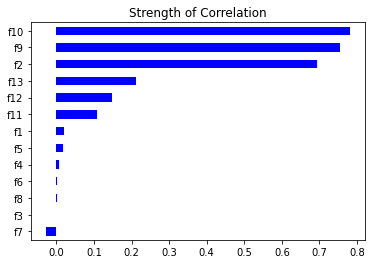

In [ ]:
# find the correlation for all features to the close price
corr = features_sc.corrwith(prices_sc.prices)
corr.sort_values().plot.barh(color = 'blue',title = 'Strength of Correlation')

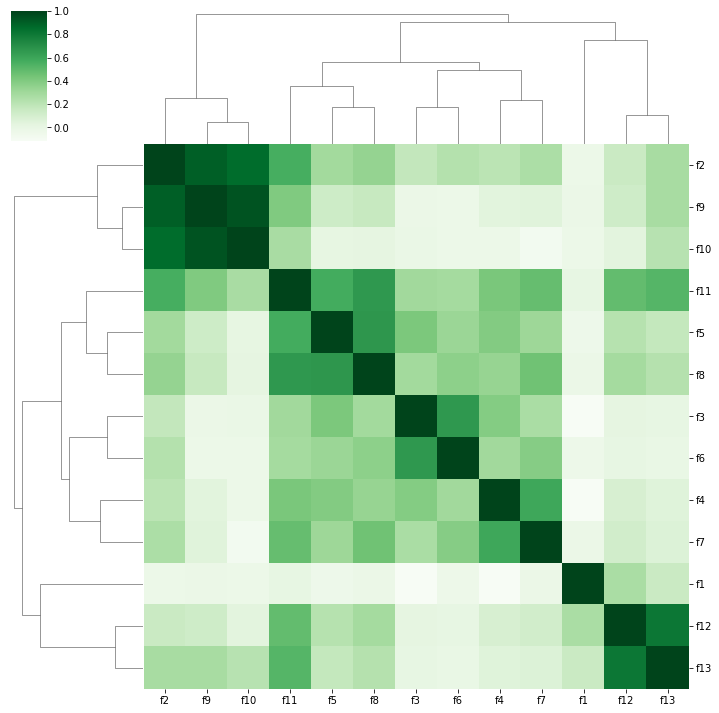

In [ ]:
# plot heatmap and find the correlation between each feature
corr_matrix = features_sc.corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(10,10),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

In [ ]:
# the correlation value of each feature
corr

f1     0.020589
f2     0.692486
f3    -0.000735
f4     0.007006
f5     0.018402
f6     0.000864
f7    -0.028236
f8     0.000824
f9     0.755253
f10    0.781779
f11    0.108006
f12    0.149022
f13    0.212584
dtype: float64

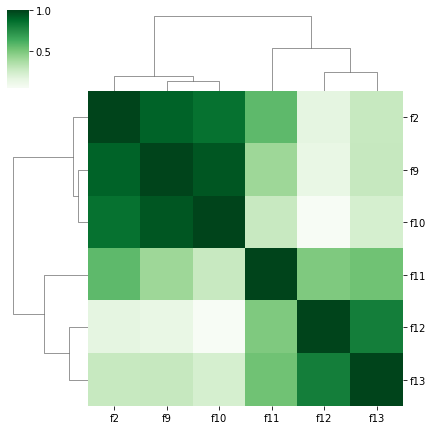

Correlation Strength:
f10    0.781779
f9     0.755253
f2     0.692486
f13    0.212584
f12    0.149022
f11    0.108006
dtype: float64


In [ ]:
# plot heatmap for the correlation value higher than 0.1
correlated_features = corr[corr>0.1].index.tolist()
corr_matrix = features_sc[correlated_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns
print("Correlation Strength:")
print(corr[corr>0.1].sort_values(ascending=False))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


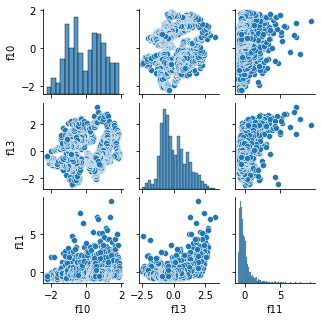

In [ ]:
# visualize the scatter plot of key features
selected_features = ['f10', 'f13', 'f11']
import seaborn as sns
sns.pairplot(features_sc[selected_features],size=1.5)

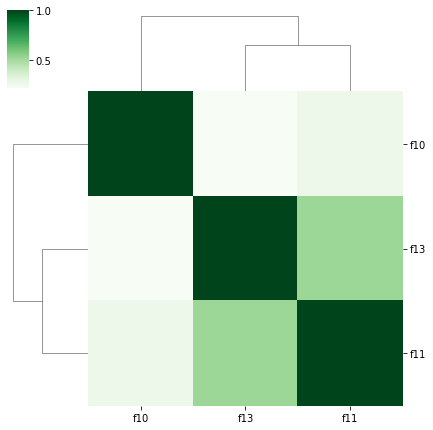

In [ ]:
# show heatmap for key features
corr_matrix = features_sc[selected_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns